In [24]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
stock = pd.read_csv("stock_descriptions.csv")

In [5]:
stock

,Symbol,AssetType,Name,Description,Sector,Industry
0,QSR,Common Stock,Restaurant Brands International Inc,"Restaurant Brands International Inc. owns, ope...",TRADE & SERVICES,RETAIL-EATING PLACES
1,ALG,Common Stock,Alamo Group Inc,"Alamo Group Inc. designs, manufactures, distri...",TECHNOLOGY,FARM MACHINERY & EQUIPMENT
2,SBUX,Common Stock,Starbucks Corporation,Starbucks Corporation is an American multinati...,TRADE & SERVICES,RETAIL-EATING & DRINKING PLACES
3,CAG,Common Stock,ConAgra Foods Inc,"Conagra Brands, Inc. (formerly ConAgra Foods) ...",MANUFACTURING,FOOD AND KINDRED PRODUCTS
4,HRL,Common Stock,Hormel Foods Corporation,Hormel Foods Corporation is an American compan...,MANUFACTURING,MEAT PACKING PLANTS
5,DPZ,Common Stock,Domino’s Pizza Inc,"Domino's Pizza, Inc., branded as Domino's, is ...",TRADE & SERVICES,WHOLESALE-GROCERIES & RELATED PRODUCTS
6,CMG,Common Stock,Chipotle Mexican Grill Inc,"Chipotle Mexican Grill, Inc., often known simp...",TRADE & SERVICES,RETAIL-EATING PLACES
7,DRI,Common Stock,Darden Restaurants Inc,"Darden Restaurants, Inc. is an American multi-...",TRADE & SERVICES,RETAIL-EATING PLACES
8,GIS,Common Stock,General Mills Inc,"General Mills, Inc., is an American multinatio...",MANUFACTURING,GRAIN MILL PRODUCTS
9,TSCO,Common Stock,Tractor Supply Company,Tractor Supply Company (TSCO) is an American r...,TRADE & SERVICES,"RETAIL-BUILDING MATERIALS, HARDWARE, GARDEN SU..."


In [13]:
stock['Description'][26]

'Coca-Cola Consolidated, Inc. produces, markets and distributes non-alcoholic beverages primarily products of The Coca-Cola Company in the United States. The company is headquartered in Charlotte, North Carolina.'

In [15]:
def get_data(symbol,start,end):
    return yf.download(symbol,start,end)

In [19]:
start_date = dt.datetime(2009,12,31)
end_date = dt.datetime(2022,12,31)

In [22]:
dic = {}
for sym in stock['Symbol']:
    data = get_data(sym,start_date,end_date)
    dic[sym] = data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [23]:
dic

{'QSR':                  Open       High        Low      Close  Adj Close   Volume
 Date                                                                      
 2014-12-11  35.049999  36.970001  34.880001  36.709999  28.573002   601900
 2014-12-12  37.220001  37.520000  35.049999  35.410000  27.561165  3836400
 2014-12-15  35.869999  35.950001  34.860001  35.290001  27.467762  1898600
 2014-12-16  35.410000  35.750000  35.349998  35.459999  27.600077  4877500
 2014-12-17  35.470001  36.599998  35.439999  36.169998  28.152699  2500200
 ...               ...        ...        ...        ...        ...      ...
 2022-12-23  64.510002  65.169998  64.260002  64.989998  62.543579   515800
 2022-12-27  65.379997  65.510002  64.900002  65.110001  62.659061   711000
 2022-12-28  64.930000  65.570000  64.489998  64.589996  62.158634   555200
 2022-12-29  64.910004  65.400002  64.620003  64.989998  62.543579   690400
 2022-12-30  64.750000  64.980003  64.190002  64.669998  62.235622   759900
 
 [2

In [30]:
def plot_price_data(sym,dic=dic):
    data = dic[sym]
    fig,ax = plt.subplots(1,1,figsize=(10,5))
    ax.plot(dic[sym].index,dic[sym]['Adj Close'])
    ax.set_title('price of {}'.format(sym))
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    plt.show();

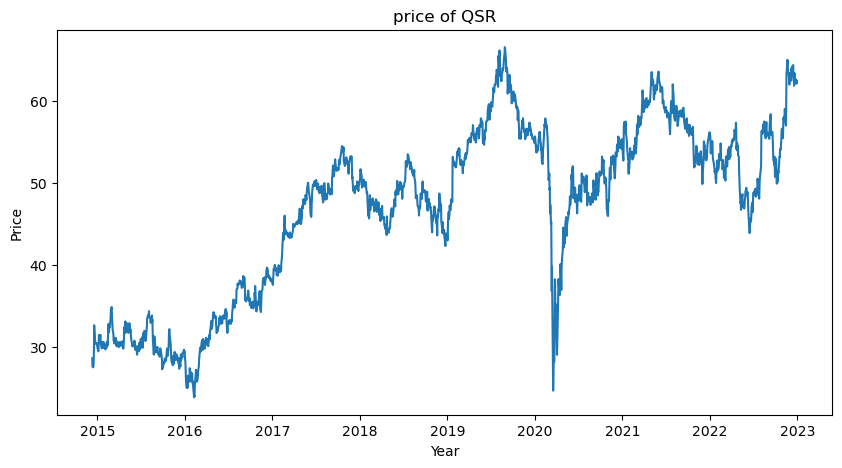

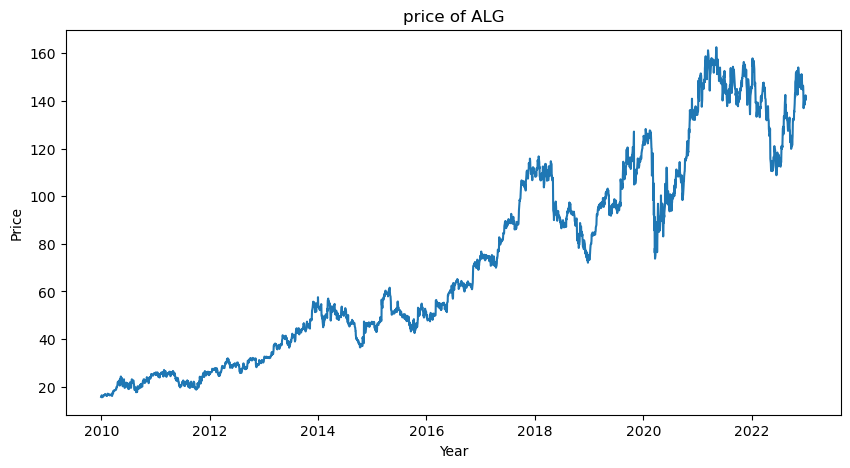

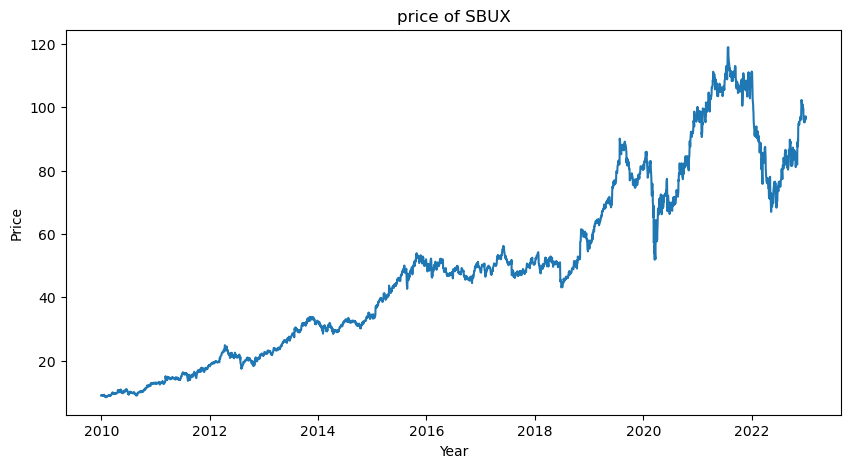

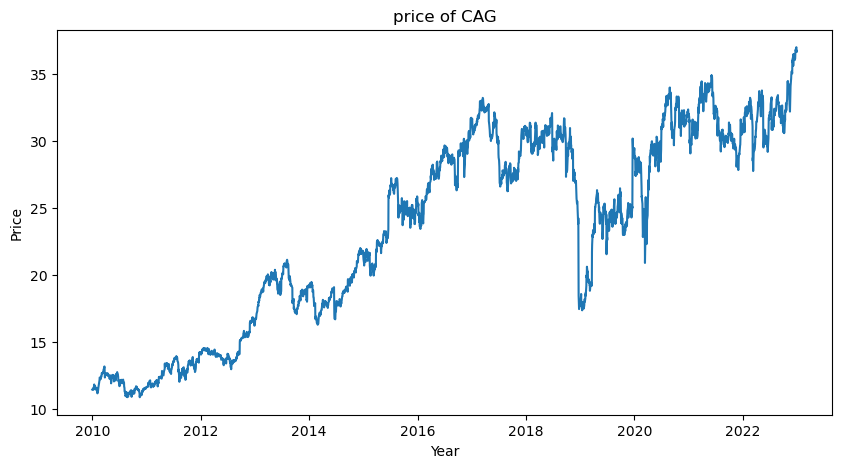

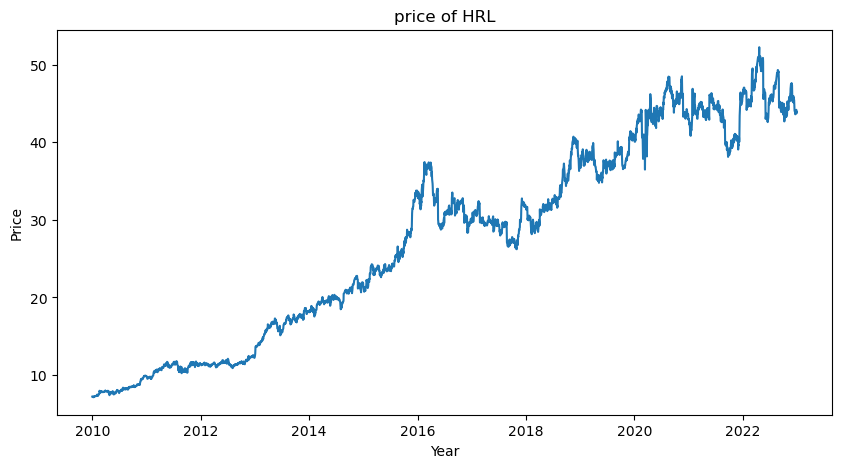

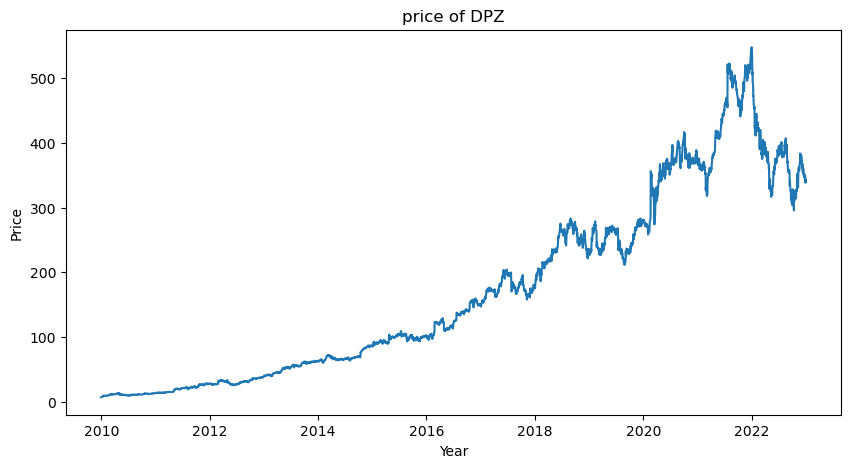

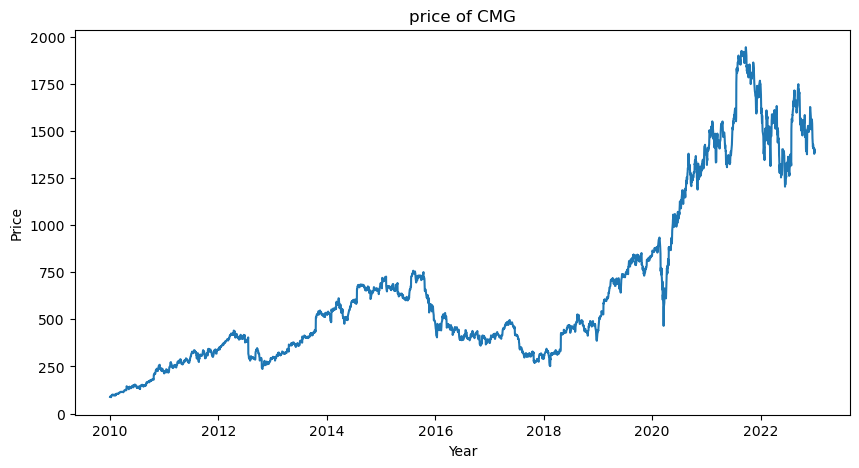

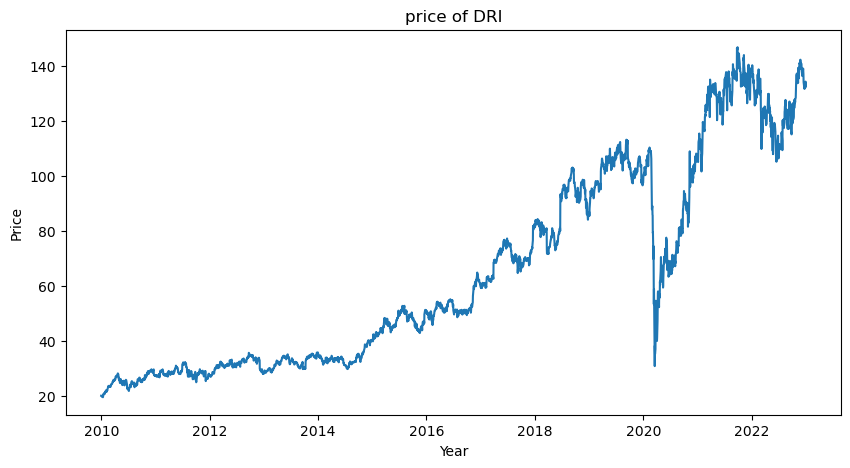

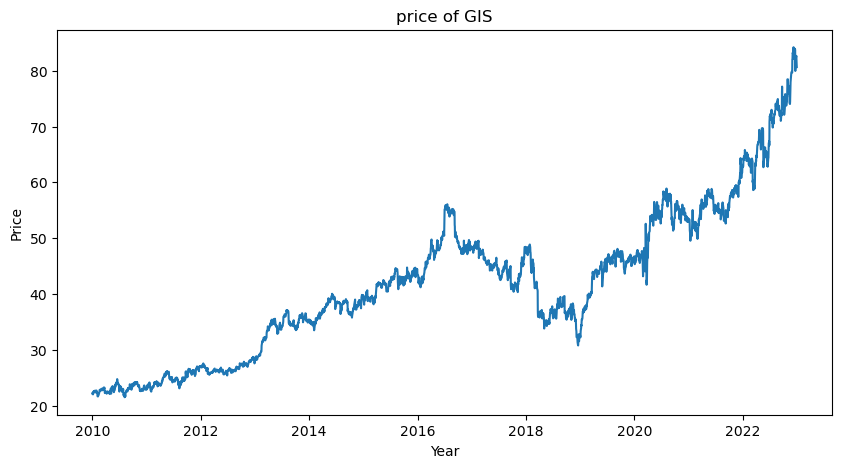

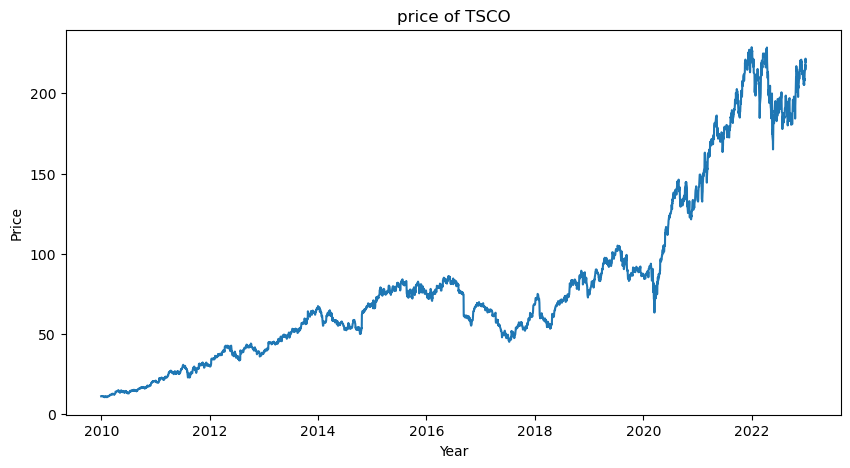

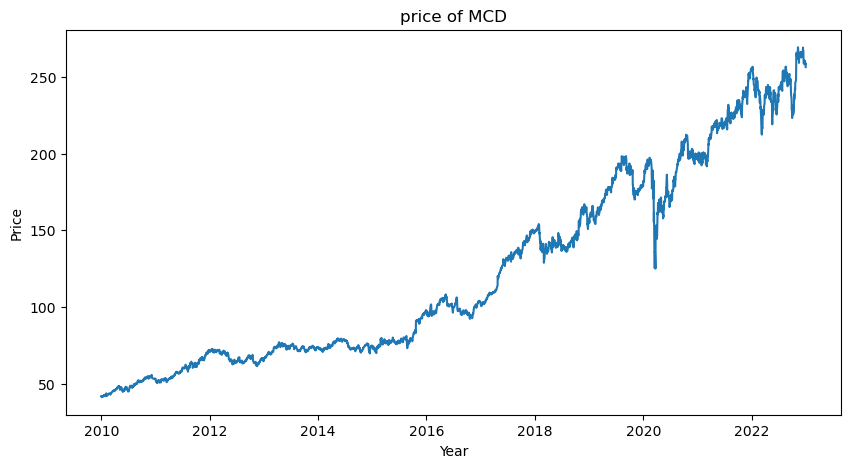

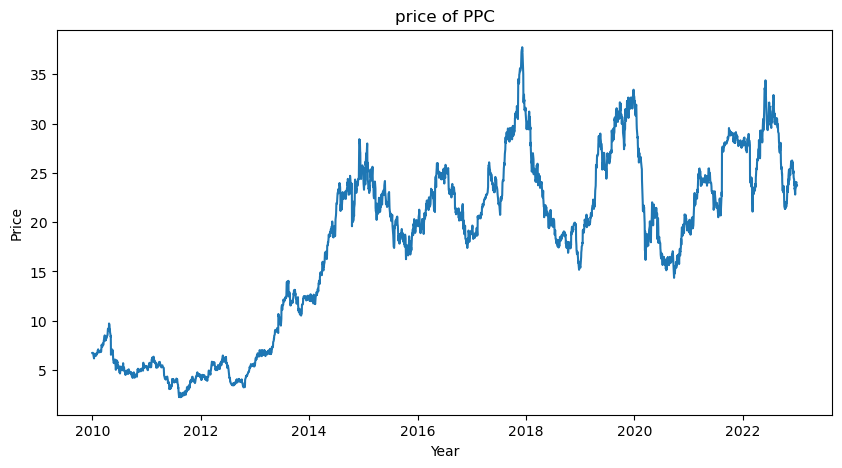

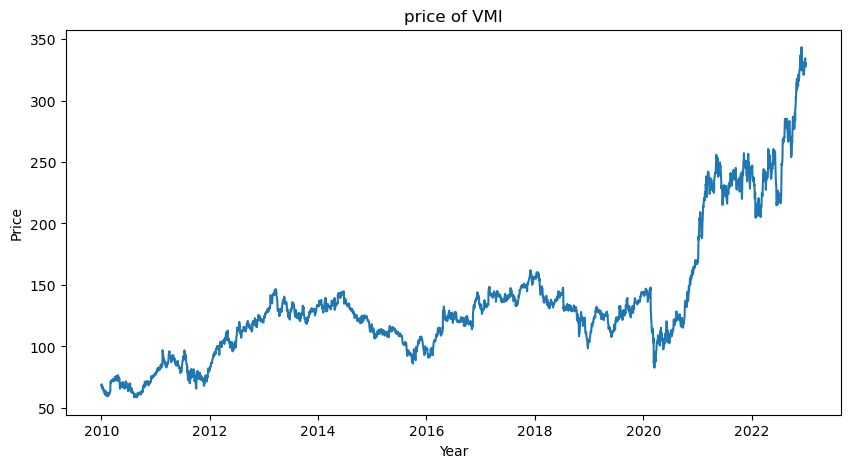

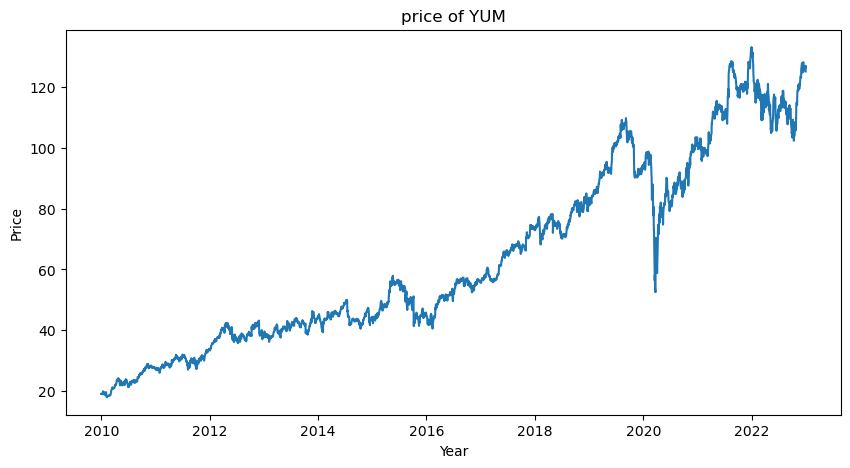

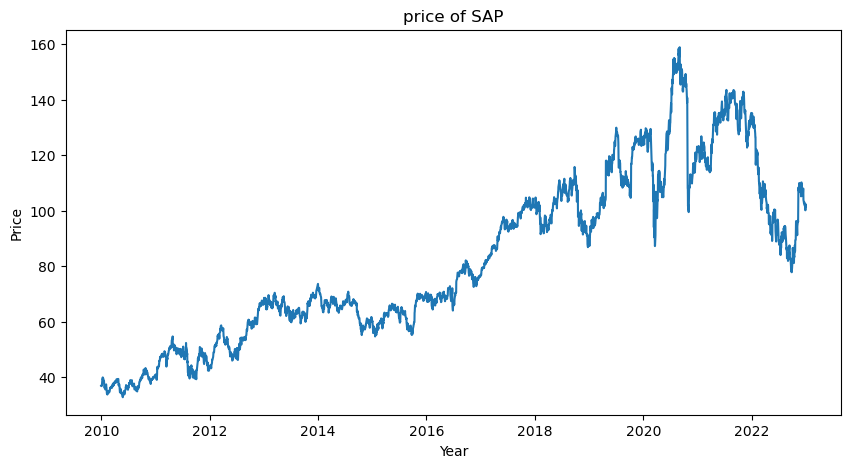

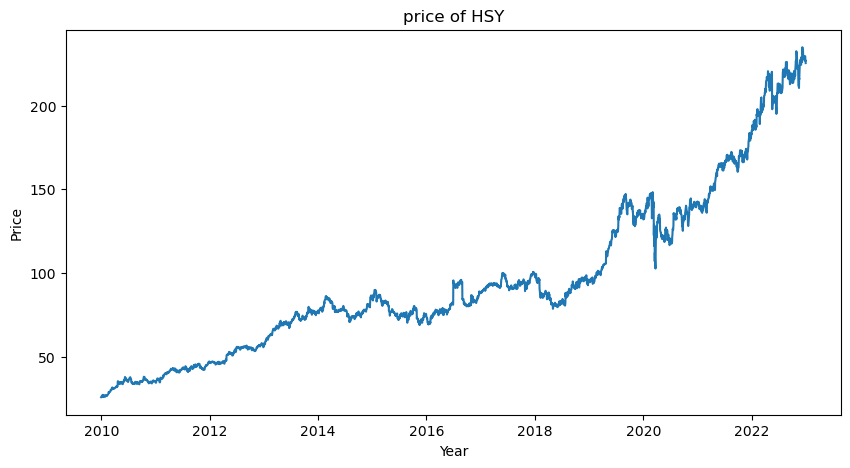

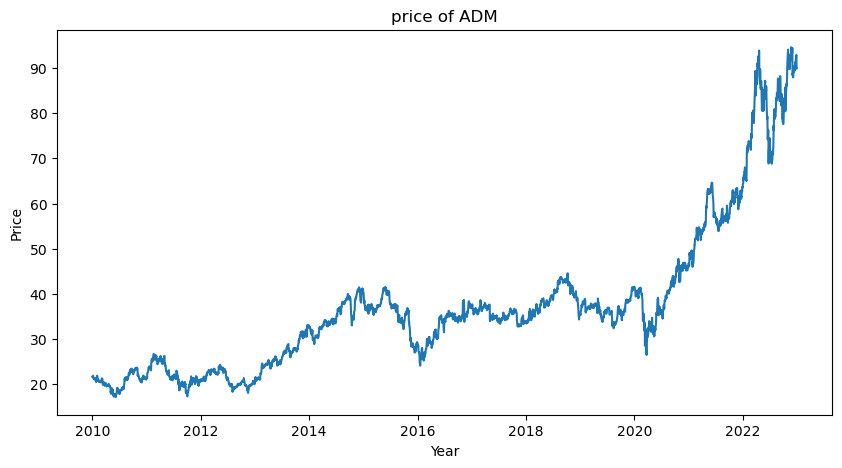

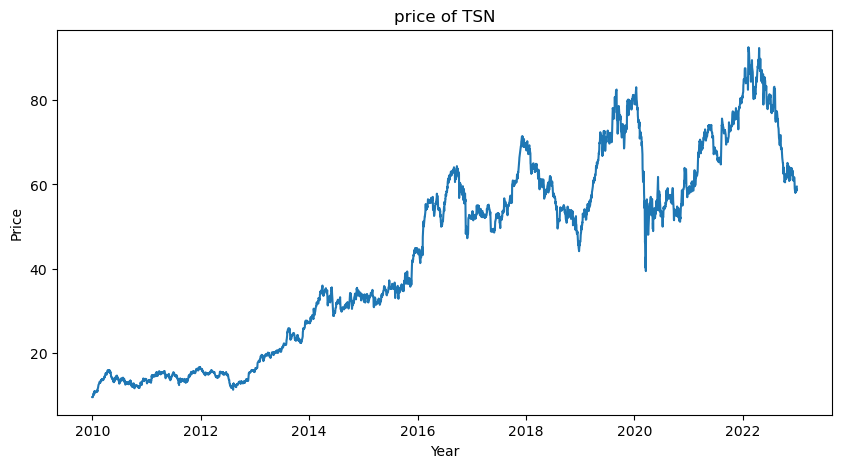

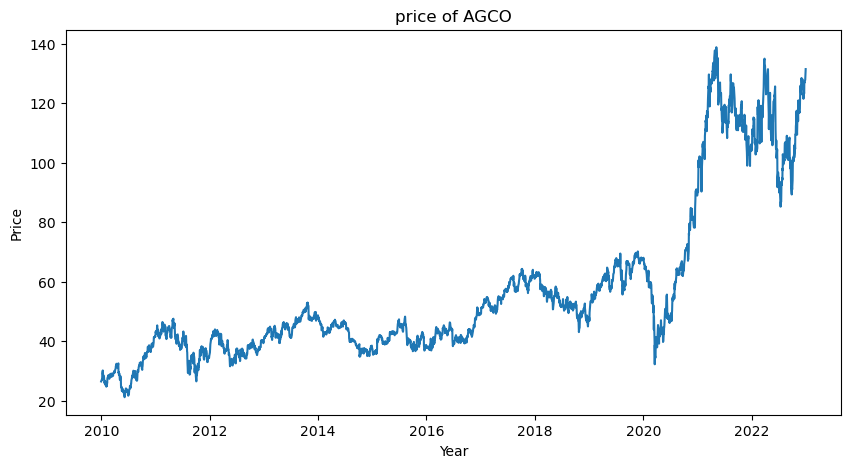

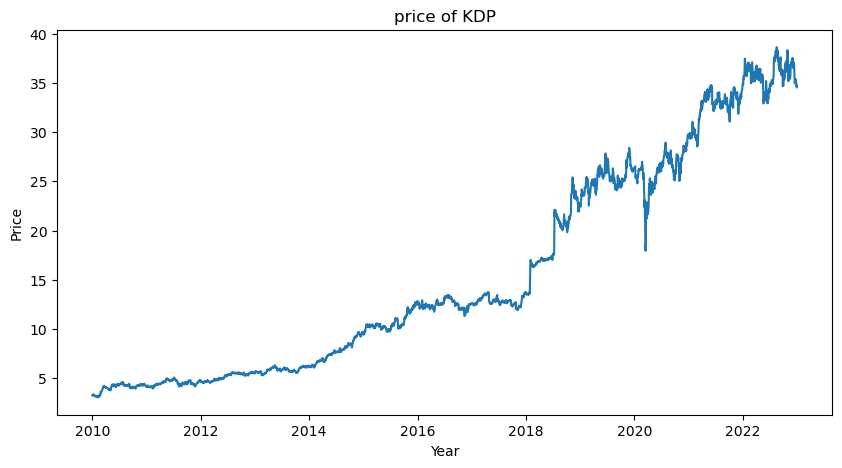

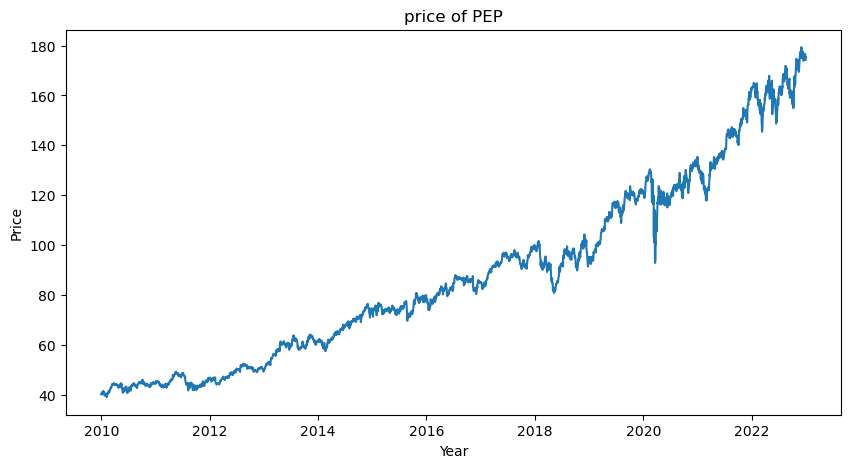

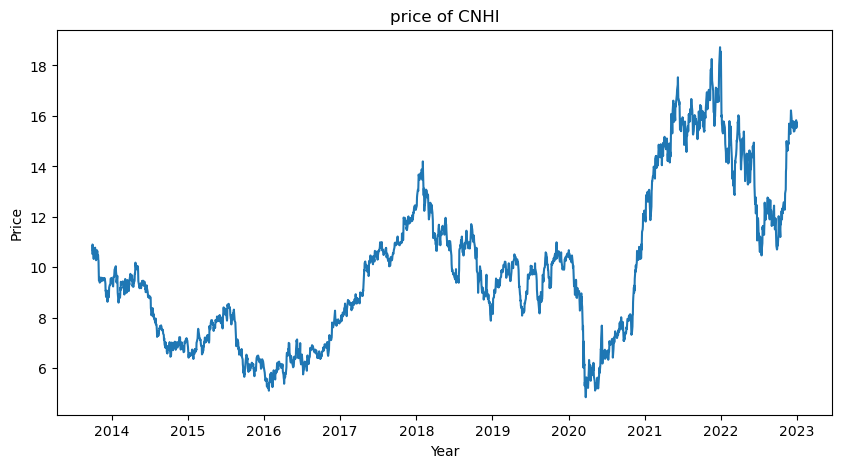

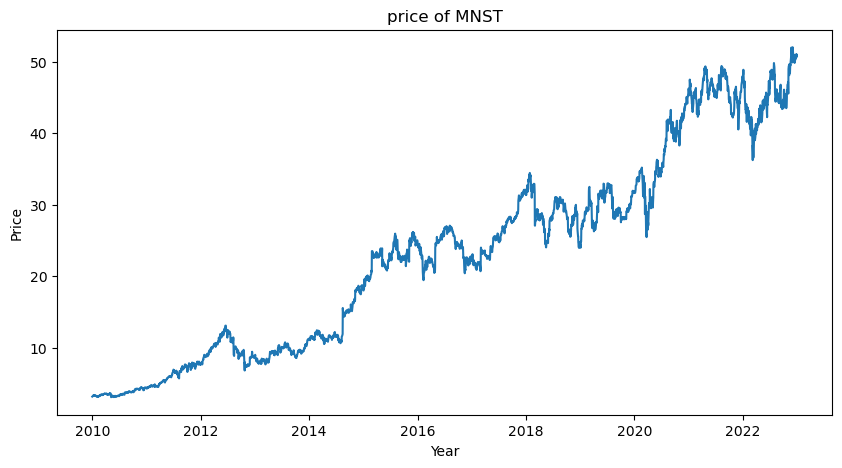

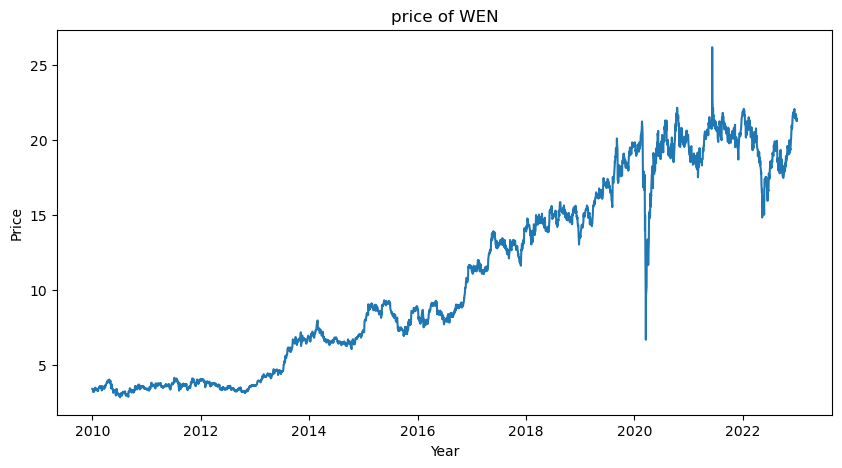

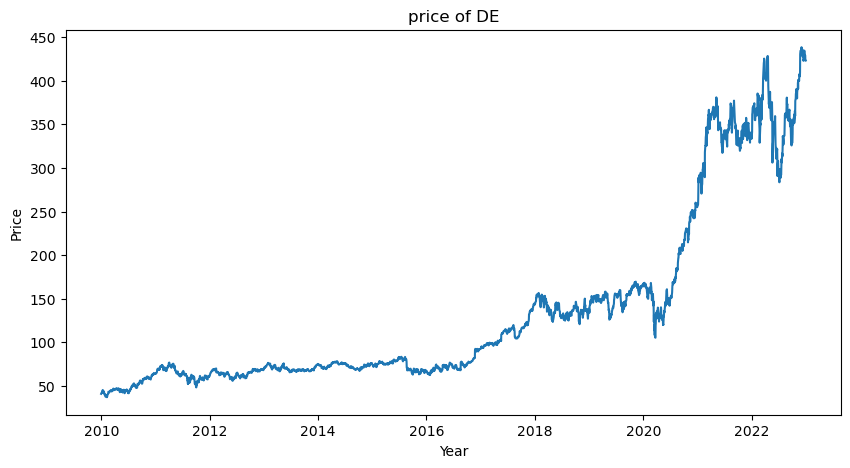

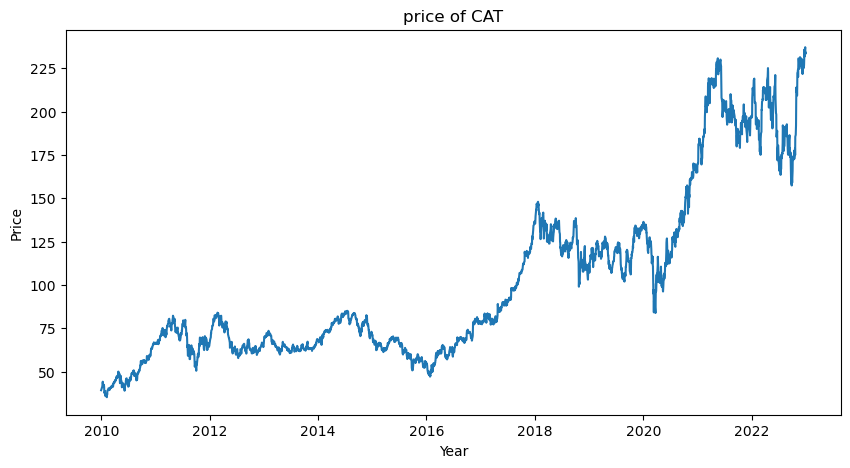

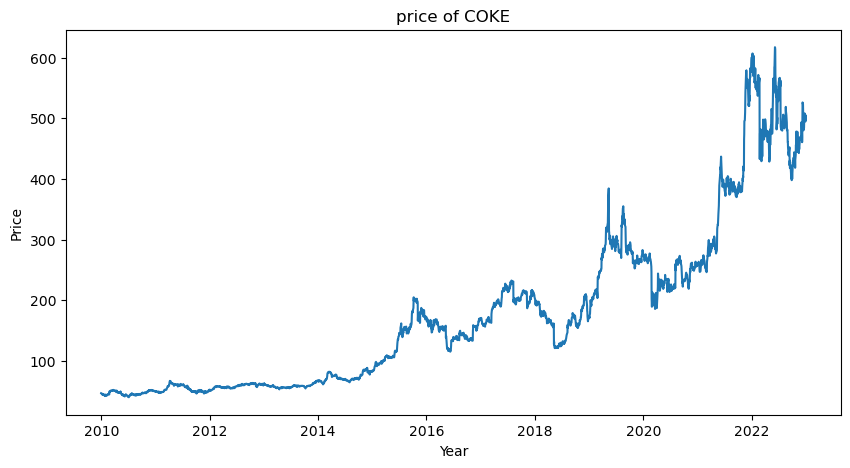

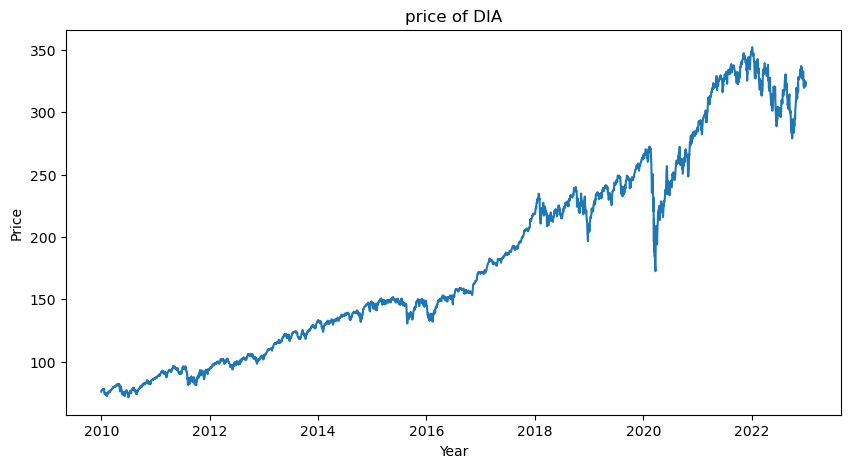

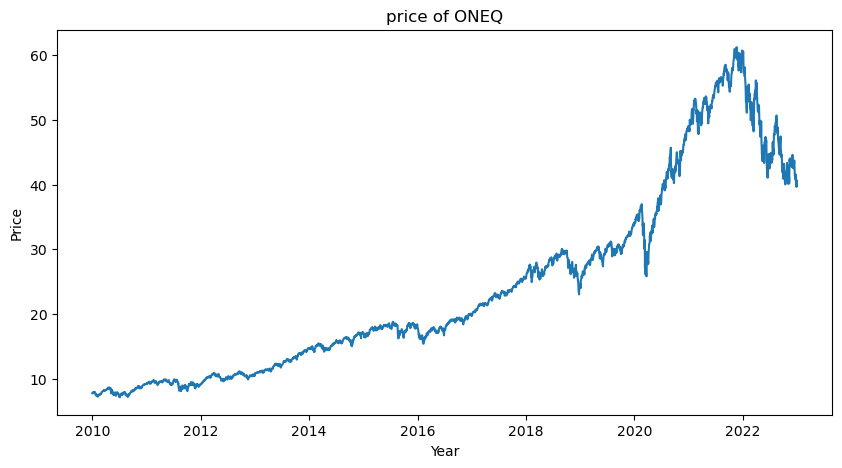

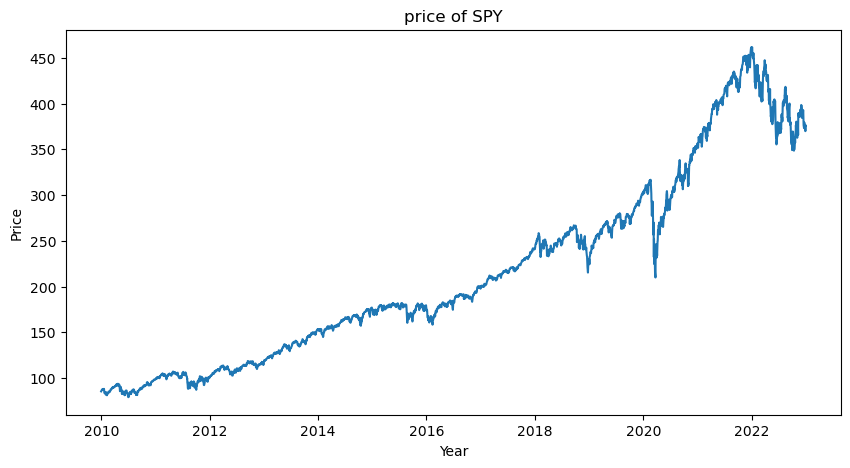

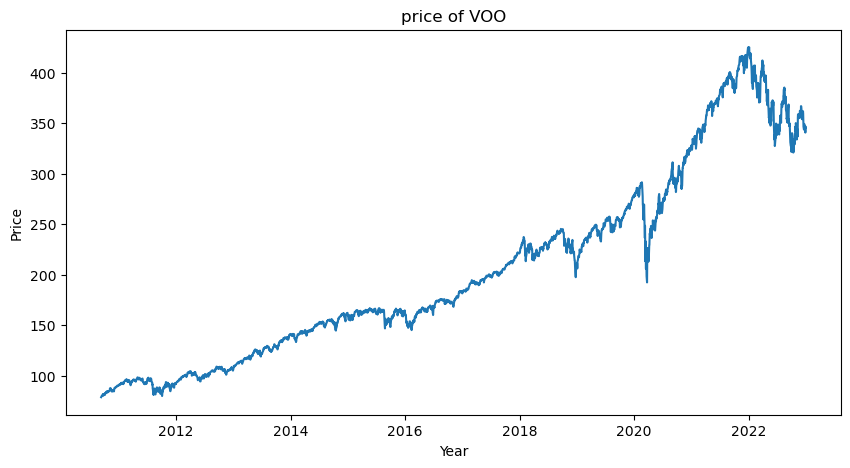

In [31]:
for sym in dic.keys():
    plot_price_data(sym)